### Read the Data 

In [1]:
import pandas as pd
import numpy as np
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from matplotlib import pyplot 
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
df1 =pd.read_csv("final_merged.csv")
sum_column = df1['PHQ+AF8-1']+df1['PHQ+AF8-2']+df1['PHQ+AF8-3']+df1['PHQ+AF8-4']+df1['PHQ+AF8-5']+df1['PHQ+AF8-6']+df1['PHQ+AF8-7']+df1['PHQ+AF8-8']+df1['PHQ+AF8-9']
df1["PHQ"] = sum_column
df =df1.iloc[:,2:59]
df["PHQ"] =df1["PHQ"]
columns=df.columns

### Detect existing (non-missing) values in our Dataset

In [2]:
df.notnull().sum()

BIRTH             6340
SEX               6337
HISPANIC          6229
RACE              6340
VET               5370
ACTIVE            1400
DEPLOY            1400
MILFAM             778
AUDIT             6340
DAST              6340
COSCREEN          6340
SCREEN            6340
BI                6340
BT                6340
RT                6340
ANYALC             803
BINGEDAYS          811
DRUGDAYS           804
ALCDRUGS           805
DAYSCOCAINE        805
MARYJDAYS          805
ANYOPIATEDAYS      804
METHADONE          805
HALLUC             805
METHDAYS           805
OTHERDRUGS         804
INJECT             808
WHERELIVE          118
PREGNANT           119
CHILDREN           119
JOBTRAIN           119
EDUC               119
EMPLOY             119
INCOME             118
ARRESTED           119
CRIMES             119
HEALTHSTAT         119
ANYSEX             119
SEXCONTACT         118
SEXUNPROTECT       118
EVERHIVT           117
HIVRESULT           90
DEPRESSDAYS        119
ANXIETYDAYS

### Preprocessing Dataset

In [3]:
x=np.where( (df['AGE'].notnull()) & (df['BIRTH'].isnull()))[0]
for i in x:
        df.iloc[i,0]=2021-df.iloc[i,55]

In [4]:
y=np.where( (df['AGE'].isnull()) & (df['BIRTH'].notnull()))[0]
for i in y:
  
    df.iloc[i,55]=2021-df.iloc[i,0]
    

In [5]:
deploy=np.where( (df['DEPLOY'].isnull()) & (df['VET']==0))[0]
for i in deploy:
    df.iloc[i,6]=0

In [6]:
active=np.where( (df['ACTIVE'].isnull()) & (df['VET']==0))[0]
for i in active:
    df.iloc[i,5]=0

In [7]:
sex=np.where((df['SEX'].isnull()) & (df['PREGNANT'].notnull()))[0] 
for i in sex: # if  PREGNANT =yes -----female
    df.iloc[i,1]=1

In [8]:
sex=np.where((df['SEX']==0) & (df['PREGNANT'].isnull()))[0]
for i in sex:
    df.iloc[i,28]=0

In [9]:
columns1=df1.columns
audit=np.where( (df1['Audit+AF8-1']==0) & (df['ANYALC'].isnull()))[0]
for i in audit: 
    df.iloc[i,15]=0

In [10]:
audit1=np.where( (df1['Audit+AF8-2']==0) & (df['ANYALC'].isnull()))[0]
for i in audit1: 
    df.iloc[i,15]=0

In [11]:
audit2=np.where( (df['AUDIT']==0) & (df['ANYALC'].isnull()))[0]
for i in audit2: 
    df.iloc[i,15]=0

In [12]:
x=np.where( (df1['Audit+AF8-1']==0) & (df['BINGEDAYS'].isnull()))[0]
for i in x: 
    df.iloc[i,16]=0

In [13]:
y=np.where( (df1['Audit+AF8-2']==0) & (df['BINGEDAYS'].isnull()))[0]
for i in y: 
    df.iloc[i,16]=0

In [14]:
z=np.where( (df['AUDIT']==0) & (df['BINGEDAYS'].isnull()))[0]
for i in z: 
    df.iloc[i,16]=0

In [15]:
z=np.where( (df1['Dast+AF8-1']==0) & (df['DRUGDAYS'].isnull()))[0]
for i in z: 
    df.iloc[i,17]=0

In [16]:
z=np.where( (df1['Dast+AF8-3']==0) & (df['DRUGDAYS'].isnull()))[0]
for i in z: 
    df.iloc[i,17]=0

In [17]:
z=np.where( (df1['Dast+AF8-5']==0) & (df['DRUGDAYS'].isnull()))[0]
for i in z: 
    df.iloc[i,17]=0

In [18]:
z=np.where( (df1['Dast+AF8-1']==0) &(df1['Audit+AF8-1']==0) &(df['ALCDRUGS'].isnull()))[0]
for i in z: 
    df.iloc[i,18]=0

In [19]:
z=np.where( (df1['Dast+AF8-3']==0) &(df1['Audit+AF8-1']==0) &(df['ALCDRUGS'].isnull()))[0]
for i in z: 
    df.iloc[i,18]=0

In [20]:
z=np.where( (df1['Dast+AF8-5']==0) &(df1['Audit+AF8-1']==0) &(df['ALCDRUGS'].isnull()))[0]
for i in z: 
    df.iloc[i,18]=0

In [21]:
z=np.where( (df1['Dast+AF8-1']==0) &(df1['Audit+AF8-2']==0) &(df['ALCDRUGS'].isnull()))[0]
for i in z: 
    df.iloc[i,18]=0

In [22]:
z=np.where( (df1['Dast+AF8-3']==0) &(df1['Audit+AF8-2']==0) &(df['ALCDRUGS'].isnull()))[0]
for i in z: 
    df.iloc[i,18]=0

In [23]:
z=np.where( (df1['Dast+AF8-5']==0) &(df1['Audit+AF8-2']==0) &(df['ALCDRUGS'].isnull()))[0]
for i in z: 
    df.iloc[i,18]=0

In [24]:
z=np.where( (df1['Dast+AF8-1']==0) &(df['AUDIT']==0) &(df['ALCDRUGS'].isnull()))[0]
for i in z: 
    df.iloc[i,18]=0

In [25]:
z=np.where( (df1['Dast+AF8-3']==0) &(df['AUDIT']==0) &(df['ALCDRUGS'].isnull()))[0]
for i in z: 
    df.iloc[i,18]=0

In [26]:
z=np.where( (df1['Dast+AF8-5']==0) &(df['AUDIT']==0) &(df['ALCDRUGS'].isnull()))[0]
for i in z: 
    df.iloc[i,18]=0

In [27]:
y=np.where( (df1['Dast+AF8-1']==0) & (df['DAYSCOCAINE'].isnull()))[0]
for i in y: 
    df.iloc[i,19]=0

In [28]:
y=np.where( (df1['Dast+AF8-1']==0) & (df['MARYJDAYS'].isnull()))[0]
for i in y: 
    df.iloc[i,20]=0

In [29]:
y=np.where( (df1['Dast+AF8-1']==0) & (df['ANYOPIATEDAYS'].isnull()))[0]
for i in y: 
    df.iloc[i,21]=0

In [30]:
y=np.where( (df1['Dast+AF8-1']==0) & (df['METHADONE'].isnull()))[0]
for i in y: 
    df.iloc[i,22]=0

In [31]:
y=np.where( (df1['Dast+AF8-1']==0) & (df['HALLUC'].isnull()))[0]
for i in y: 
    df.iloc[i,23]=0

In [32]:
y=np.where( (df1['Dast+AF8-1']==0) & (df['METHDAYS'].isnull()))[0]
for i in y: 
    df.iloc[i,24]=0

In [33]:
y=np.where( (df1['Dast+AF8-1']==0) & (df['OTHERDRUGS'].isnull()))[0]
for i in y: 
    df.iloc[i,25]=0

In [34]:
y=np.where( (df1['Dast+AF8-1']==0) & (df['INJECT'].isnull()))[0]
for i in y: 
    df.iloc[i,26]=0

In [35]:
y=np.where( (df1['Audit+AF8-8']>2) & (df['ARRESTED'].isnull()))[0]
for i in y: 
    df.iloc[i,34]=1

In [36]:
y=np.where( (df1['Dast+AF8-9']==1) & (df['ARRESTED'].isnull()))[0]
for i in y: 
    df.iloc[i,34]=1

### Detect existing (non-missing) values in our Dataset after Preprocessing

In [37]:
df.notnull().sum()

BIRTH             6947
SEX               6375
HISPANIC          6229
RACE              6340
VET               5370
ACTIVE            5370
DEPLOY            5370
MILFAM             778
AUDIT             6340
DAST              6340
COSCREEN          6340
SCREEN            6340
BI                6340
BT                6340
RT                6340
ANYALC            5451
BINGEDAYS         5457
DRUGDAYS          6424
ALCDRUGS          5214
DAYSCOCAINE       6368
MARYJDAYS         6368
ANYOPIATEDAYS     6368
METHADONE         6368
HALLUC            6368
METHDAYS          6368
OTHERDRUGS        6367
INJECT            6372
WHERELIVE          118
PREGNANT          2808
CHILDREN           119
JOBTRAIN           119
EDUC               119
EMPLOY             119
INCOME             118
ARRESTED           143
CRIMES             119
HEALTHSTAT         119
ANYSEX             119
SEXCONTACT         118
SEXUNPROTECT       118
EVERHIVT           117
HIVRESULT           90
DEPRESSDAYS        119
ANXIETYDAYS

### Scoring the AUDIT
### 1)  1 to 7 ---> 0 low-risk 
### 2) 8 to 14 ---> 1 meduim-risk
### 3) more than 15 --> 2 high-risk 


In [38]:
y=np.where( (df["AUDIT"]>=0) & (df["AUDIT"]<7))[0]
for i in y: 
    df.iloc[i,8]=0
    
y=np.where( (df["AUDIT"]>=7) & (df["AUDIT"]<15))[0]
for i in y: 
    df.iloc[i,8]=1

y=np.where( (df["AUDIT"]>=15))[0]
for i in y: 
    df.iloc[i,8]=2

     

## OUR GOAL in this experment to find the class of DAST-10 to give Suggested Action
###   DAST-10 Score:   /   Degree of Problem:  /   Suggested Action:
###   0: ---> CLASS 0  /  No problems reported / None at this time
### 1-2: ---> CLASS 1  /  Low level Monitor /    re‐assessatalaterdate
### 3-6: ---> CLASS 2  /  Moderate level   /     Further investigation 
### 6–8: ---> CLASS 3   / Substantial level   /  Intensive assessment
### 9–10: ---> CLASS 4  / Severe level    /      Intensive assessment

In [39]:
y1=np.where( (df["DAST"]==0))[0]
for i in y1: 
    df.iloc[i,9]=0 
           
           
y2=np.where( (df["DAST"]<3)  & (df["DAST"]>=1))[0]
for i in y2: 
    df.iloc[i,9]=1
           
y3=np.where((df["DAST"]<6) & (df["DAST"]>=3))[0]
for i in y3: 
    df.iloc[i,9]=2

y4=np.where((df["DAST"]<9) & (df["DAST"]>=6))[0]
for i in y4: 
    df.iloc[i,9]=3
           
y5=np.where((df["DAST"]<=10) & (df["DAST"]>=9))[0]
for i in y5: 
    df.iloc[i,9]=4

### Choose the columns covered more than 70% from the Dataset 

In [40]:
df=df[['DAST','BIRTH','SEX','HISPANIC', 'RACE','VET','ACTIVE','DEPLOY','AUDIT',
       'COSCREEN','SCREEN','BI','BT','RT','ANYALC','BINGEDAYS',
      'DRUGDAYS','ALCDRUGS','DAYSCOCAINE','MARYJDAYS','ANYOPIATEDAYS','METHADONE','HALLUC','METHDAYS','OTHERDRUGS','INJECT','AGE','TOBMONTH']]
df=  df.dropna()
df1=df[['DAST']]

In [41]:
df=df[['BIRTH','SEX','HISPANIC', 'RACE','VET','ACTIVE','DEPLOY','AUDIT',
       'COSCREEN','SCREEN','BI','BT','RT','ANYALC','BINGEDAYS',
      'DRUGDAYS','ALCDRUGS','DAYSCOCAINE','MARYJDAYS','ANYOPIATEDAYS','METHADONE','HALLUC','METHDAYS','OTHERDRUGS','INJECT','AGE','TOBMONTH']]


### Splitting the Dataset


In [42]:
X = df
y = df1


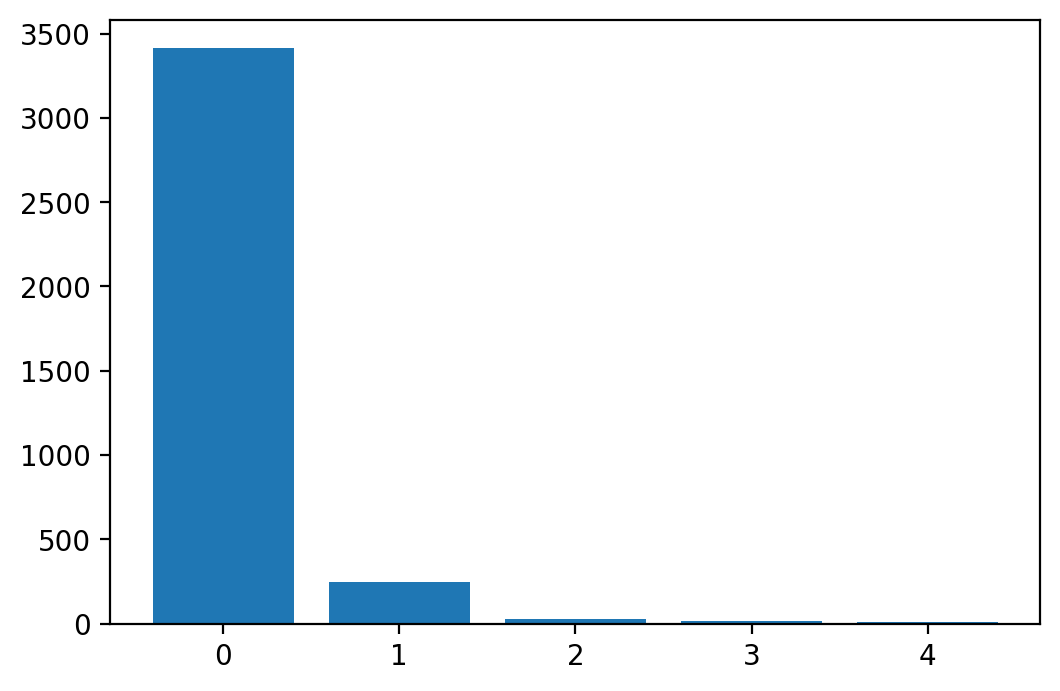

In [43]:
class_=y.value_counts()
pyplot.bar([0,1,2,3,4], [class_[0],class_[1],class_[2],class_[3],class_[4]])
pyplot.show()

### How to deal with Multi-Class Imbalanced Classification?
###  ** SMOTE Oversampling for Multi-Class Classification

### Oversampling refers to copying or synthesizing new examples of the minority classes so that the number of examples in the minority class better resembles or matches the number of examples in the majority classes.

In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

X,y=df,df1
# label encode the target variable

### A bar chart of the class distribution will be created, providing a strong visual indication that all classes now have the same number of examples.

Class=1, n=3413 (20.000%)
Class=0, n=3413 (20.000%)
Class=2, n=3413 (20.000%)
Class=4, n=3413 (20.000%)
Class=3, n=3413 (20.000%)


/home/sameerahtalafha/anaconda3/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


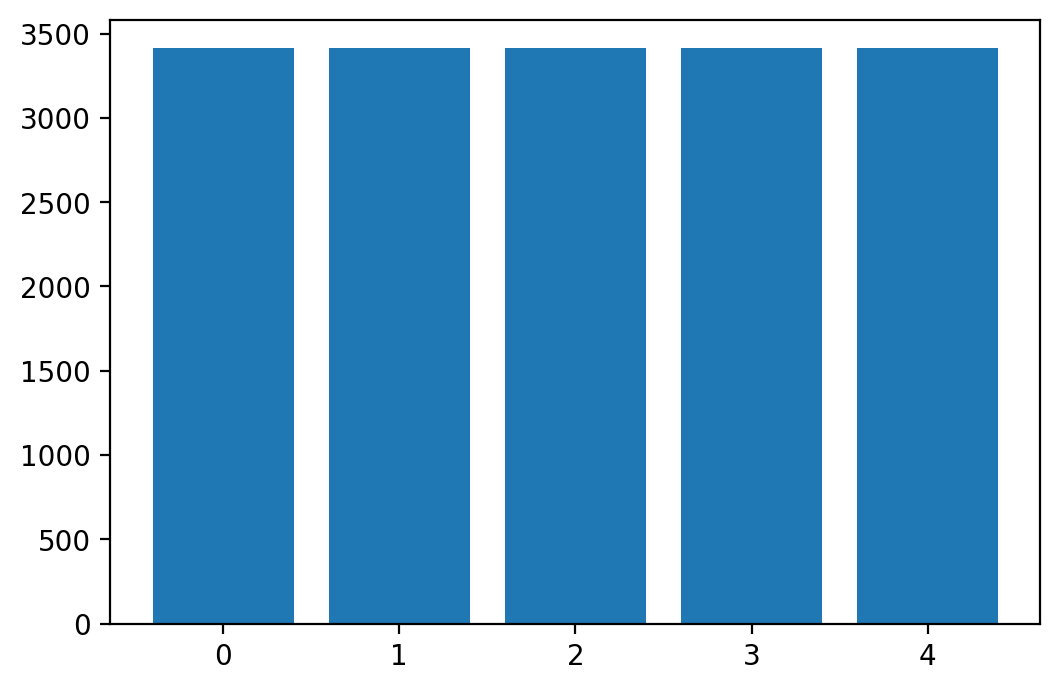

In [45]:

y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [46]:
#efault weighting for classes 0 and 1.0 that have many examples and a double class weighting of 2.0 for the other classes.
X,y=df,df1

strategy = {0:6813, 1:6813, 2:6813, 3:6813, 4:6813}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
y = LabelEncoder().fit_transform(y)
weights = 'balanced'
X.shape

/home/sameerahtalafha/anaconda3/envs/py3.8/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (6813) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 3413)
  warnings.warn(
/home/sameerahtalafha/anaconda3/envs/py3.8/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (6813) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 3413)
  warnings.warn(
/home/sameerahtalafha/anaconda3/envs/py3.8/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (6813) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 3413)
  warnings.warn(
/home/sameerahtalafha/anaconda3/envs/py3.8/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of 

(34065, 27)

## First Model :  Decision Tree

In [47]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=6, class_weight=weights)
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.1, random_state = 1)


# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

clf.fit(X_train,y_train)
scores = evaluate_model(X_train, y_train,clf)
# summarize performance
print('Cross_validation_Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Cross_validation_Mean Accuracy: 0.997 (0.001)


In [48]:
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test_Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test_Accuracy: 0.9976518931611388


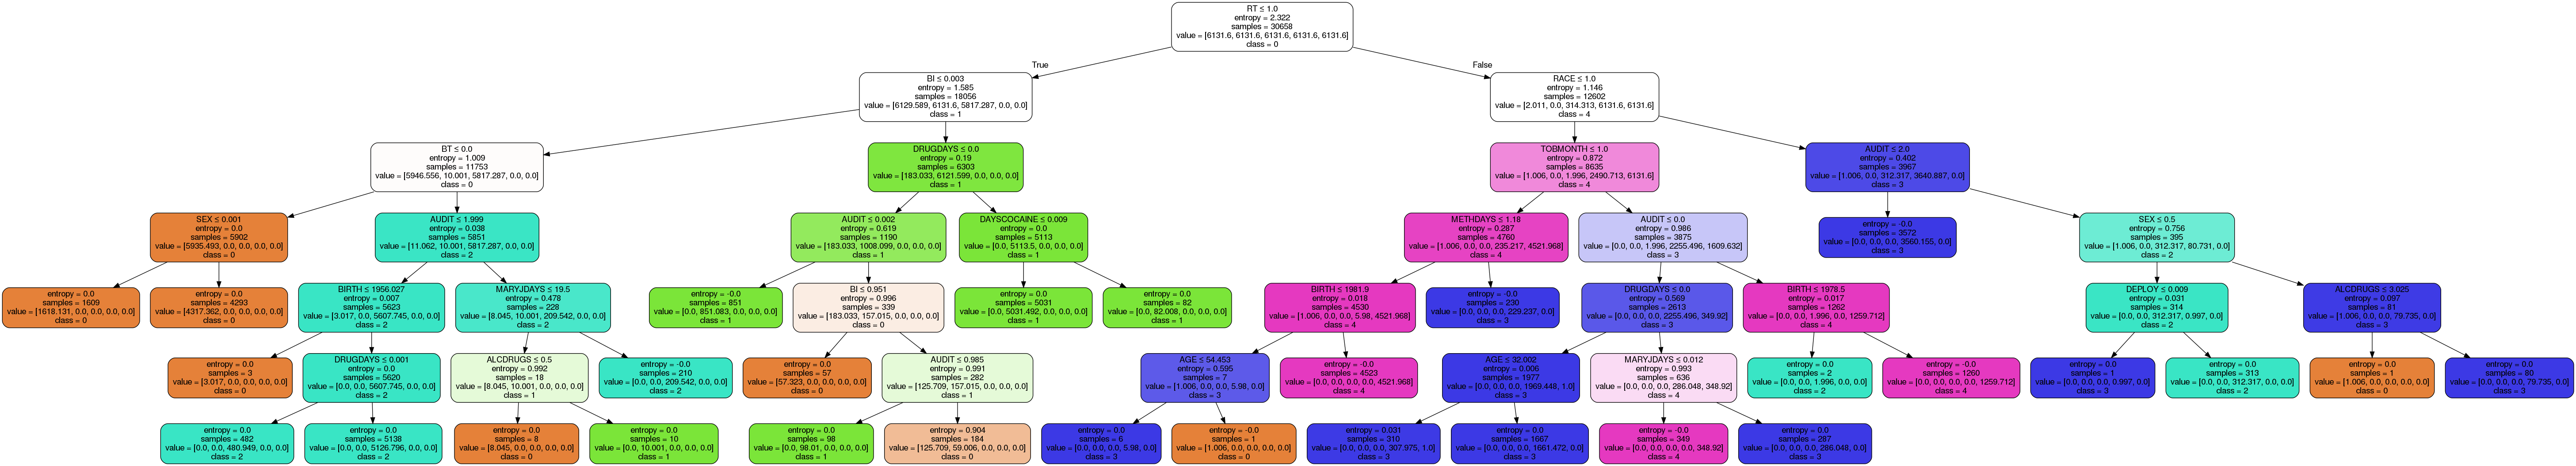

In [49]:
feature_cols=['BIRTH','SEX','HISPANIC', 'RACE','VET','ACTIVE','DEPLOY','AUDIT',
       'COSCREEN','SCREEN','BI','BT','RT','ANYALC','BINGEDAYS',
      'DRUGDAYS','ALCDRUGS','DAYSCOCAINE','MARYJDAYS','ANYOPIATEDAYS','METHADONE','HALLUC','METHDAYS','OTHERDRUGS','INJECT','AGE','TOBMONTH']


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT.png')
Image(graph.create_png())

### Second Model : Random Forest

In [50]:
# instantiate random forest classifier object

rft = RandomForestClassifier(n_estimators=1000,criterion="entropy", class_weight=weights, max_depth= 5)# fit the model to the training data:
rft.fit(X_train, y_train)
scores = evaluate_model(X_train, y_train,rft)
# summarize performance
print('Cross_validation_Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Cross_validation_Mean Accuracy: 0.993 (0.002)


In [51]:
y_pred = rft.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test_Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test_Accuracy: 0.9932491928382742


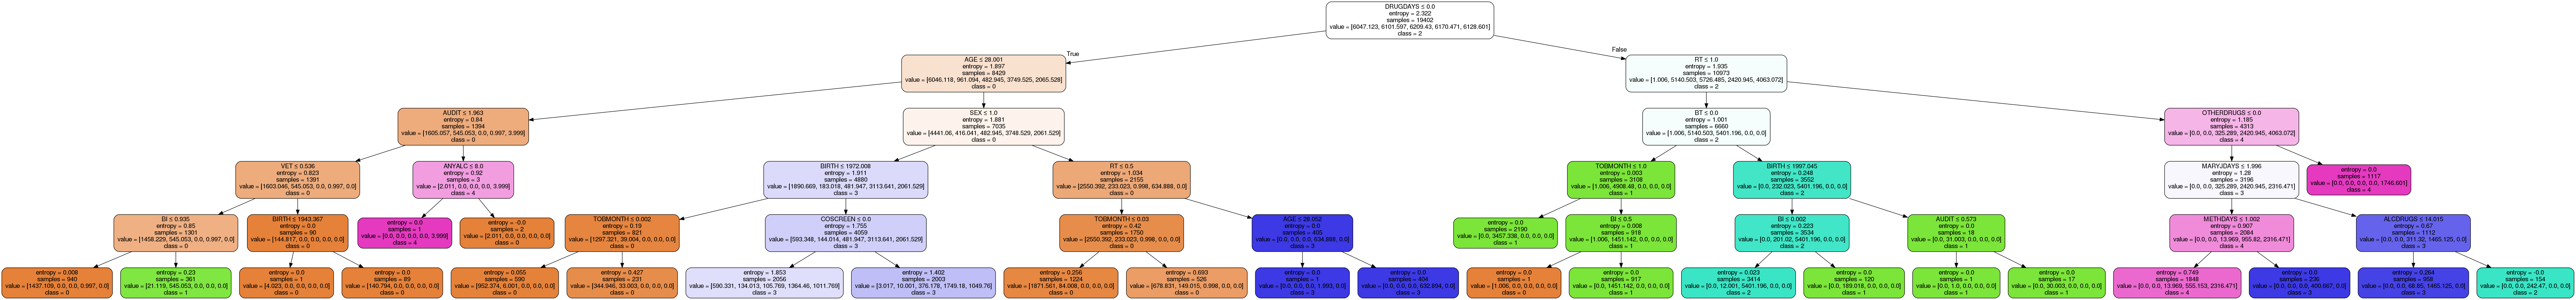

In [58]:

# Extract single tree
estimator = rft.estimators_[5]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('RandomForest.png')
Image(graph.create_png())


### Third Model: Gradient Boosting

In [53]:
# instantiate gradient boost classifier object
gbc = GradientBoostingClassifier(random_state = 15, max_depth= 5)# fit the model to the training data:
gbc.fit(X_train, y_train)
scores = evaluate_model(X_train, y_train,gbc)
# summarize performance
print('Cross_validation_Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Cross_validation_Mean Accuracy: 0.999 (0.000)


In [54]:
y_pred = rft.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test_Accuracy:",metrics.accuracy_score(y_test, y_pred))


Test_Accuracy: 0.9932491928382742


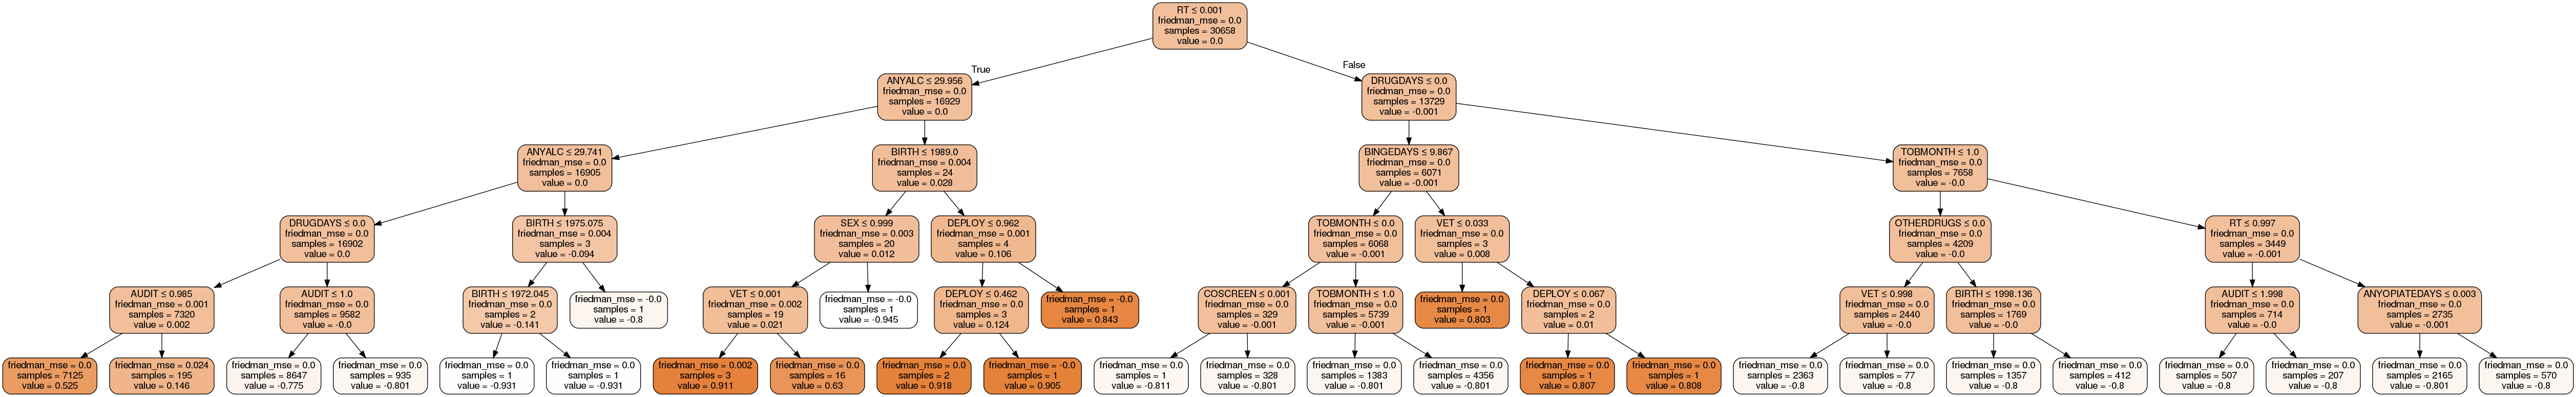

In [64]:
# Extract single tree
estimator = gbc.estimators_[42, 0]

dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('GradientBoosting.png')
Image(graph.create_png())
